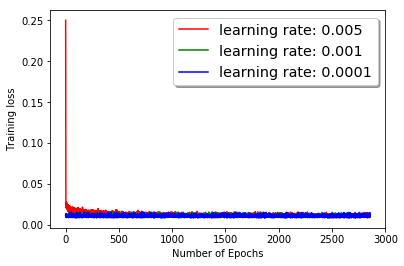

In [92]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import *

#Sample code for loading data

def Load_data():
    with np.load("notMNIST.npz") as data :
        Data, Target = data ["images"], data["labels"]
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
        #trainData is a tuple of size 3500
        return trainData,trainTarget,validData,validTarget,testData,testTarget

def build_graph():
        W = tf.Variable(tf.truncated_normal(shape=[784,1], stddev=0.5), name='weights') #not too sure about stddev
        b = tf.Variable(0.0, name='biases')
        X = tf.placeholder(tf.float32, [None, 784], name='input_x')
        y_target = tf.placeholder(tf.float32, [None,1], name='target_y')
        learn_rate=tf.placeholder(tf.float32,shape=[],name='learn_rate')

        # Graph definition
        y_predicted = tf.matmul(X,W) + b
     
        
        meanSquaredError = tf.divide(tf.reduce_mean(tf.reduce_sum(tf.square(y_predicted - y_target), 
                                                        reduction_indices=1, 
                                                        name='squared_error'), 
                                          name='mean_squared_error'),2)
        #tf.meanSquaredError()
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learn_rate)
        train = optimizer.minimize(loss=meanSquaredError)
        return W, b, X, y_target, y_predicted,learn_rate,meanSquaredError, train

        
        
        
trainData,trainTarget,validData,validTarget,testData,testTarget=Load_data()
w,b,x,y_target,y_predicted,learn_rate,mse,train=build_graph()

#Reshape the data to N x 784 format
N=len(trainData)
trainData = np.reshape(trainData, [N, 28*28])
#print(trainTarget)
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
learn= [0.005,0.001,0.0001]
result=[]
epochs=0
for rate in learn:
    learnrate=rate
    tempresult=[]
    for step in range(0,20000):
        randomshuffle= randint(1, 3000)+500
        minix=trainData[randomshuffle-500:randomshuffle]
        miniy=trainTarget[randomshuffle-500:randomshuffle]
        _, err, currentW, currentb, yhat = sess.run([train, mse, w, b, y_predicted], feed_dict={x: minix, y_target: miniy,learn_rate:learnrate})
        if(step%7==0):
            tempresult.append(err)
    epochs=(len(tempresult))
    result.append(tempresult)

x = np.arange(epochs)
y = result[0]
color=['r','g','b']
for idx, val in enumerate(learn):
    line, = plt.plot(x, result[idx],color=color[idx], label="learning rate: "+str(val))
    
plt.legend(loc='upper right', shadow=True, fontsize='x-large')

    
plt.ylabel('Training loss')
plt.xlabel('Number of Epochs')
plt.show()

# 